In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

In [3]:
k=pd.read_csv("E://data//Insurance Dataset.csv")

In [4]:
k.head(20)

,Premiums Paid,Age,Days to Renew,Claims made,Income
0,2800,26,233,3890.076336,28000
1,2950,27,130,2294.444444,29500
2,3100,28,144,2564.545455,31000
3,3250,30,65,1978.260870,32500
4,3400,32,56,2009.090909,34000
5,3550,35,89,2349.454545,35500
6,3700,44,95,2503.345725,37000
7,3850,45,48,2217.405063,38500
8,4000,46,76,2527.777778,40000
9,6225,56,200,6908.231707,41500


In [5]:
insurance=k

In [6]:
insurance.head(15)

,Premiums Paid,Age,Days to Renew,Claims made,Income
0,2800,26,233,3890.076336,28000
1,2950,27,130,2294.444444,29500
2,3100,28,144,2564.545455,31000
3,3250,30,65,1978.260870,32500
4,3400,32,56,2009.090909,34000
5,3550,35,89,2349.454545,35500
6,3700,44,95,2503.345725,37000
7,3850,45,48,2217.405063,38500
8,4000,46,76,2527.777778,40000
9,6225,56,200,6908.231707,41500


In [7]:
#normalising data
def normfunc(i):
    x=((i-i.min()/i.max()-i.min()))
    return x

In [8]:
normdata=normfunc(insurance)

In [9]:
normdata.describe()

,Premiums Paid,Age,Days to Renew,Claims made,Income
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,9742.156355,22.829512,119.396885,10600.712650,74249.841360
std,6790.731666,13.887641,88.055767,13695.906762,43517.237964
min,-0.093645,-0.280488,-0.003115,-0.019847,-0.158640
25%,4174.906355,10.719512,54.996885,3242.368018,37124.841360
50%,9024.906355,21.719512,87.996885,6407.763190,74249.841360
75%,12674.906355,31.219512,185.496885,12692.608803,111374.841360
max,27099.906355,58.719512,319.996885,97698.463473,148499.841360


In [10]:
#clustering
t=[]
k=list(range(2,13))
for i in k:
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(normdata)
    t.append(kmeans.inertia_)
    
t

[65174012426.430885,
 35671789910.82308,
 25715672094.68203,
 19464444624.091766,
 15227587910.032576,
 12142702694.061998,
 10326443808.751408,
 8723554164.79535,
 7664359416.800607,
 6477879259.669182,
 5595299488.47484]

Text(0, 0.5, 'total_within_SS')

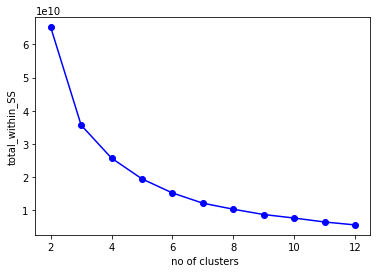

In [11]:
#plotting elbow curve
plt.plot(k,t,'bo-')
plt.xlabel(" no of clusters")
plt.ylabel("total_within_SS")

In [12]:
model=KMeans(n_clusters=3)
model.fit(normdata)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [13]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [14]:
final=pd.Series(model.labels_)
insurance['clust']=final

In [15]:
insurance

,Premiums Paid,Age,Days to Renew,Claims made,Income,clust
0,2800,26,233,3890.076336,28000,1
1,2950,27,130,2294.444444,29500,1
2,3100,28,144,2564.545455,31000,1
3,3250,30,65,1978.260870,32500,1
4,3400,32,56,2009.090909,34000,1
...,...,...,...,...,...,...
95,25575,63,76,16161.979170,170500,0
96,25800,62,166,23715.151520,172000,0
97,26025,59,167,24043.401020,173500,0
98,26250,58,245,40147.058820,175000,0


In [16]:
insurance=insurance.iloc[:,[5,0,1,2,3,4]]

In [17]:
insurance.groupby(insurance.clust).mean()

,Premiums Paid,Age,Days to Renew,Claims made,Income
clust,,,,,
0,19785.15625,51.531250,146.000,22441.650867,153250.0
1,5656.25000,41.156250,100.875,4477.407010,51250.0
2,12225.00000,45.694444,115.000,11013.596795,102250.0


In [18]:
insurance.to_csv("Kmeans_insurance.csv", encoding = "utf-8")